In [1]:
import keras
keras.__version__

'2.8.0'

<p dir="rtl" align="right">
<font size="+2" face="homa">
  <b>
دسته‌بندی اخبار: مثال دسته‌بندی چند کلاسی
  <br><br>
  <font size="+1" face="homa">
  فصل ۳ قسمت ۵ 
  </b>

<hr>

<p dir="rtl" align="justify">
<font face="homa">
در قسمت قبلی، نحوه دسته‌بندی ورودی‌های برداری را به دو کلاس با استفاده از شبکه عصبی متراکم بررسی کردیم؛ اما زمانی که بیش از دو کلاس داریم، چه اتفاقی می‌افتد؟
<br>
  <b>
مجموعه ‌داده رویترز
  </b>
<br>
در این مثال از مجموعه ‌داده رویترز استفاده شده است. مجموعه‌ای از اخبار کوتاه و موضوع متناظر هر خبر که در سال 1986 توسط رویترز منتشر شده است؛ این مجموعه ‌داده بسیار ساده بوده و معمولاً در شروع یادگیری مبحث دسته‌بندی متن مورد استفاده قرار می‌گیرد. 46 موضوع مختلف در این مجموعه ‌داده موجود هستند که برخی از آن‌ها بیشتر از بقیه تکرار شده‌اند، اما از هر موضوع حداقل 10 نمونه در مجموعه آموزشی وجود دارد.
<br>
 مجموعه ‌داده رویترز مانند IMDB و MNIST بخشی از پکیج کراس است که در اینجا به کنکاش در آن می‌پردازیم.

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 1s 0us/step


<p dir="rtl" align="justify">
<font face="homa">
مانند مجموعه ‌داده IMDB، آرگومان num_words=10000 داده‌ها را به 10000 کلمه پرتکرار محدود می‌کند.
<br>
 این مجموعه ‌داده شامل 8982 نمونه آموزشی و 2246 نمونه آزمایش است:
<br>


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

<p dir="rtl" align="justify">
<font face="homa">
همانند نظرات IMDB، هر نمونه، لیستی از اعداد صحیح (اندیس‌های کلمه‌ها) است:
<br>



In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

<p dir="rtl" align="justify">
<font face="homa">
در ادامه نحوه کدگشایی و تبدیل این اعداد به متن اولیه نشان داده شده است.
<br>


In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

<p dir="rtl" align="justify">
<font face="homa">
برچسب مرتبط با یک نمونه داده که عددی صحیح بین 0 و 45 است و اندیس موضوعی آن را نشان می‌دهد.
<br>


In [8]:
train_labels[10]

3

<p dir="rtl" align="right">
<font size="+2" face="homa">
  <b>
آماده‌سازی داده‌ها 
  <br><br>
  <font size="+1" face="homa">
  </b>

<hr>

<p dir="rtl" align="justify">
<font face="homa">
دقیقاً با همان کدهای مثال قبل، می‌توان داده‌ها را به صورت برداری تبدیل کرد.


In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

<p dir="rtl" align="justify">
<font face="homa">
برای برداری کردن برچسب‌ها، دو راهکار وجود دارد: می‌توانید لیست برچسب‌ها را به صورت تنسور عدد صحیح بنویسید یا از کدگذاری تک-یک  استفاده کنید. کدگذاری تک-یک، فرمتی متداول برای داده‌های دسته‌ای است که کدگذاری دسته‌ای  نیز نامیده می‌شود. توضیحات تفصیلی کدگذاری تک-یک در قسمت 6-1 آمده است. در این مثال، کدگذاری تک-یک شده برچسب‌ها عبارت است از نگاشت هر برچسب به یک بردار تمام صفر که فقط اندیس موضوع متناظر در آن 1 است. در اینجا یک مثال ذکر می‌کنیم:
<br>


In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

<p dir="rtl" align="justify">
<font face="homa">
توجه کنید که در کراس تابع آماده‌ای برای این کار وجود دارد که قبلاً در مثال MNIST مشاهده کرده‌اید:
<br>


In [11]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

<p dir="rtl" align="right">
<font size="+2" face="homa">
  <b>
ساخت شبکه
  <br><br>
  <font size="+1" face="homa">
  </b>

<hr>

<p dir="rtl" align="justify">
<font face="homa">
مسئله دسته‌بندی موضوعی به مسئله دسته‌بندی نظرات در مورد فیلم‌ها شباهت دارد: در هر دو مورد، هدف دسته‌بندی تکه‌های کوتاهی از متن است؛ اما در اینجا محدودیت جدیدی داریم: تعداد کلاس‌های خروجی از 2 به 46 رسیده است و تعداد بعد فضای خروجی بسیار بزرگ‌تر است.
<br>
در پشته لایه‌های Dense که از آن‌ها استفاده کرده‌ایم، هر لایه فقط می‌تواند به اطلاعاتی دسترسی داشته باشد که در خروجی لایه قبلی موجود هستند. اگر یک ‌لایه اطلاعاتی را در ارتباط با مسئله دسته‌بندی جا بیندازد، این اطلاعات هرگز توسط لایه‌های بعدی بازیابی نخواهد شد: به طور بالقوه هر لایه به گلوگاه اطلاعاتی بدل می‌شود. در مثال قبلی، از لایه‌های میانی 16 بعدی استفاده کردیم اما فضای 16 بعدی ممکن است برای یادگیری 46 کلاس مختلف، بیش ‌از اندازه محدود باشد. چنین لایه‌های کوچکی ممکن است به ‌مثابه گلوگاه اطلاعات عمل کرده و برای همیشه اطلاعات مرتبط را حذف کنند.
<br>
به همین دلیل، از لایه‌های بزرگ‌تر استفاده خواهیم کرد. حال می‌خواهیم با 46 واحد کار را انجام دهیم.
<br>


In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

<p dir="rtl" align="justify">
<font face="homa">
توجه به دو نکته دیگر در ارتباط با این معماری ضروری است:
<br>
*	شبکه باید با لایه Dense به‌اندازه 46 به پایان برسد؛ یعنی، برای هر نمونه ورودی، شبکه یک بردار 46 بعدی را به ‌عنوان خروجی تولید خواهد کرد. هر درایه در این بردار (هر بعد) کلاس خروجی متفاوتی (موضوع متفاوتی) را کدگذاری خواهد کرد.
<br>
*	لایه آخر از فعال‌سازی softmax استفاده می‌کند. این الگو که در مثال MNIST نیز مورد استفاده قرار گرفت بدین معناست که خروجی شبکه، توزیع احتمال در 46 کلاس خروجی مختلف خواهد بود، به عبارت دیگر برای هر نمونه ورودی، شبکه یک بردار خروجی 46 بعدی را تولید خواهد کرد که در آن output[i] احتمال متعلق بودن نمونه به کلاس i است. جمع 46 درایه برابر با 1 خواهد بود.
<br>
بهترین تابع هزینه‌ای که می‌توان در این مورد به کار برد categorical_crossentropy است. این تابع فاصله بین توزیع احتمال خروجی شبکه و توزیع حقیقی برچسب‌ها را اندازه می‌گیرد. با به حداقل رساندن فاصله بین این دو توزیع، شبکه یاد می‌گیرد که خروجی هرچه نزدیک‌تر به برچسب حقیقی را تولید کند.


In [13]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

<p dir="rtl" align="right">
<font size="+2" face="homa">
  <b>
اعتبارسنجی رویکرد
  <br><br>
  <font size="+1" face="homa">
  </b>

<hr>

<p dir="rtl" align="justify">
<font face="homa">
حال می‌خواهیم هزار نمونه را از داده‌های آموزشی جدا کنیم و به عنوان مجموعه اعتبارسنجی از آن‌ها استفاده کنیم.
<br>


In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

<p dir="rtl" align="justify">
<font face="homa">
در اینجا شبکه را برای 20 تکرار آموزش می‌دهیم.
<br>


In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 4s 129ms/step - loss: 2.5052 - accuracy: 0.5262 - val_loss: 1.6361 - val_accuracy: 0.6580
Epoch 2/20
16/16 [==============================] - 3s 182ms/step - loss: 1.3619 - accuracy: 0.7122 - val_loss: 1.2588 - val_accuracy: 0.7340
Epoch 3/20
16/16 [==============================] - 2s 101ms/step - loss: 1.0121 - accuracy: 0.7889 - val_loss: 1.1000 - val_accuracy: 0.7750
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.7934 - accuracy: 0.8340 - val_loss: 0.9998 - val_accuracy: 0.7810
Epoch 5/20
16/16 [==============================] - 1s 79ms/step - loss: 0.6267 - accuracy: 0.8652 - val_loss: 0.9645 - val_accuracy: 0.7890
Epoch 6/20
16/16 [==============================] - 1s 81ms/step - loss: 0.4994 - accuracy: 0.8934 - val_loss: 0.8951 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 1s 71ms/step - loss: 0.4006 - accuracy: 0.9141 - val_loss: 0.8740 - val_accuracy: 0.8240
Epoch 8/20

<p dir="rtl" align="justify">
<font face="homa">
و در آخر منحنی‌های خطا و دقت آن‌ را نشان می‌دهیم 
<br>


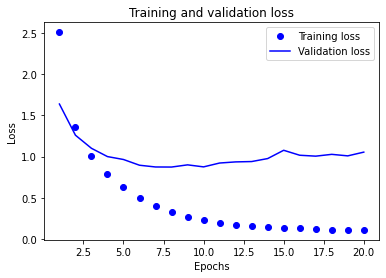

In [16]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

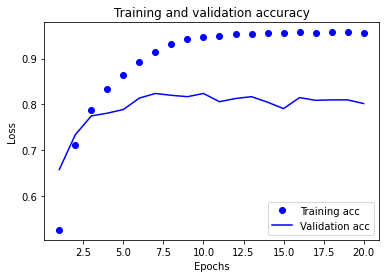

In [23]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<p dir="rtl" align="justify">
<font face="homa">
بعد از 9 تکرار، شبکه شروع به بیش‌برازش می‌کند. حال می‌خواهیم شبکه جدیدی را از نو برای 9 تکرار، آموزش داده و سپس آن‌ را روی مجموعه آزمایش ارزیابی کنیم.
<br>


In [24]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 2s 78ms/step - loss: 2.6468 - accuracy: 0.5249 - val_loss: 1.7671 - val_accuracy: 0.6190
Epoch 2/8
16/16 [==============================] - 1s 75ms/step - loss: 1.4577 - accuracy: 0.6999 - val_loss: 1.3239 - val_accuracy: 0.7250
Epoch 3/8
16/16 [==============================] - 4s 263ms/step - loss: 1.0706 - accuracy: 0.7762 - val_loss: 1.1419 - val_accuracy: 0.7580
Epoch 4/8
16/16 [==============================] - 1s 88ms/step - loss: 0.8366 - accuracy: 0.8239 - val_loss: 1.0530 - val_accuracy: 0.7840
Epoch 5/8
16/16 [==============================] - 1s 61ms/step - loss: 0.6624 - accuracy: 0.8654 - val_loss: 0.9757 - val_accuracy: 0.8020
Epoch 6/8
16/16 [==============================] - 1s 65ms/step - loss: 0.5277 - accuracy: 0.8935 - val_loss: 0.9341 - val_accuracy: 0.8160
Epoch 7/8
16/16 [==============================] - 2s 106ms/step - loss: 0.4259 - accuracy: 0.9153 - val_loss: 0.9034 - val_accuracy: 0.8130
Epoch 8/8
71/71 [=

In [25]:
results

[1.0197855234146118, 0.7760462760925293]

<p dir="rtl" align="justify">
<font face="homa">
دقت این رویکرد در حدود 80 درصد است. در یک مسئله دسته‌بندی دودویی متوازن، دقت به‌ دست ‌آمده از دسته‌بندی کننده کاملاً تصادفی 50 درصد خواهد بود؛ اما در این مورد، نزدیک به 19 درصد است، بنابراین نتایج به‌دست‌آمده حداقل در مقایسه با روش پایه  تصادفی مناسب هستند:
<br>

In [26]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18477292965271594

<p dir="rtl" align="right">
<font size="+2" face="homa">
  <b>
پیش‌بینی داده‌های جدید
  <br><br>
  <font size="+1" face="homa">
  </b>

<hr>

<p dir="rtl" align="justify">
<font face="homa">
می‌توان با فراخوانی متد predict (پیش‌بینی) از مدل آموزش داده شده، یک توزیع احتمال برای 46 موضوع مختلف تولید کرد. در ادامه پیش‌بینی‌ موضوع برای تمامی داده‌های آزمایش تولید شده است.
<br>


In [27]:
predictions = model.predict(x_test)

<p dir="rtl" align="justify">
<font face="homa">
هر آیتم در predictions برداری با 46 درایه است:
<br>

In [28]:
predictions[0].shape

(46,)

<p dir="rtl" align="justify">
<font face="homa">
جمع ضرایب در این بردار برابر با 1 است:
<br>

In [29]:
np.sum(predictions[0])

1.0000001

<p dir="rtl" align="justify">
<font face="homa">
اندیس حاوی بزرگ‌ترین مقدار، کلاس پیش‌بینی شده است، یعنی همان کلاسی است که بالاترین احتمال را دارد:
<br>

In [30]:
np.argmax(predictions[0])

3

<p dir="rtl" align="right">
<font size="+2" face="homa">
  <b>
روشی متفاوت برای کار با برچسب‌‌ها و تابع هزینه
  <br><br>
  <font size="+1" face="homa">
  </b>

<hr>

<p dir="rtl" align="justify">
<font face="homa">
قبلاً، متذکر شدیم که روش دیگر کدگذاری برچسب‌ها، تبدیل آن‌ها به ‌تنسور اعداد صحیح است:
<br>


In [31]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

<p dir="rtl" align="justify">
<font face="homa">
تنها چیزی که در این رویکرد تغییر می‌کند، انتخاب تابع هزینه است. تابع هزینه categorical_crossentropy که در نمونه کد قبلی ذکر شد، نیاز به استفاده از کدگذاری دسته‌بندی دارد. برای برچسب‌هایی که عدد صحیح هستند باید از sparse_categorical_crossentopy استفاده شود:
<br>

In [32]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

<p dir="rtl" align="justify">
<font face="homa">
این تابع هزینه جدید، از نظر ریاضی با categorical_crossentropy یکسان است و فقط رابط متفاوتی دارد.
<br>

<p dir="rtl" align="right">
<font size="+2" face="homa">
  <b>
اهمیت اندازه لایه‌های میانی
  <br><br>
  <font size="+1" face="homa">
  </b>

<hr>

<p dir="rtl" align="justify">
<font face="homa">
قبلاً عنوان کردیم که چون خروجی‌ نهایی 46 بعدی است، باید از کاربرد لایه‌های میانی با کمتر از 46 واحد پنهان، اجتناب کرد. حال به بررسی تأثیر لایه میانی با تعداد کمتر از ۴۶ واحد، مثلاً ۴، می‌پردازیم.
<br>


In [33]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 7s 101ms/step - loss: 3.3645 - accuracy: 0.1515 - val_loss: 2.7108 - val_accuracy: 0.5430
Epoch 2/20
63/63 [==============================] - 1s 22ms/step - loss: 2.0443 - accuracy: 0.5816 - val_loss: 1.6823 - val_accuracy: 0.6010
Epoch 3/20
63/63 [==============================] - 1s 23ms/step - loss: 1.4112 - accuracy: 0.6518 - val_loss: 1.4651 - val_accuracy: 0.6550
Epoch 4/20
63/63 [==============================] - 3s 45ms/step - loss: 1.1859 - accuracy: 0.6928 - val_loss: 1.3674 - val_accuracy: 0.6610
Epoch 5/20
63/63 [==============================] - 2s 38ms/step - loss: 1.0491 - accuracy: 0.7360 - val_loss: 1.3361 - val_accuracy: 0.6690
Epoch 6/20
63/63 [==============================] - 2s 29ms/step - loss: 0.9491 - accuracy: 0.7645 - val_loss: 1.3181 - val_accuracy: 0.6980
Epoch 7/20
63/63 [==============================] - 2s 28ms/step - loss: 0.8610 - accuracy: 0.7866 - val_loss: 1.3243 - val_accuracy: 0.7180
Epoch 8/20
6

<p dir="rtl" align="justify">
<font face="homa">
در این شرایط دقت اعتبارسنجی مدل تقریباً 71 درصد است، یعنی 8 درصد کاهش داشته است. این کاهش بیشتر به خاطر این واقعیت است که اطلاعات بسیار زیادی (اطلاعاتی که برای تفکیک فضای حالت 46 کلاس کافی باشند) در یک فضای میانی با ابعاد بسیار پایین فشرده می‌شوند. شبکه این توانایی را دارد که اکثر اطلاعات ضروری را به صورت بازنمایی‌های ۴ بعدی فشرده کند، اما نه همه آن‌ها را.
<br>

<p dir="rtl" align="right">
<font size="+2" face="homa">
  <b>
آزمایش‌های بیشتر
  <br><br>
  <font size="+1" face="homa">
  </b>

<hr>

<p dir="rtl" align="justify">
<font face="homa">
*	استفاده از لایه‌های بزرگ‌تر یا کوچک‌تر را امتحان کنید: 32 واحدی، 128 واحدی و الی‌آخر
<br>
*	استفاده از یک یا سه لایه پنهان را امتحان کنید.
<br>


<p dir="rtl" align="right">
<font size="+2" face="homa">
  <b>
جمع‌بندی
  <br><br>
  <font size="+1" face="homa">
  </b>

<hr>

<p dir="rtl" align="justify">
<font face="homa">
مواردی که باید از این مثال بیاموزید به شرح زیر است:
<br>
*	اگر می‌خواهید یک مسئله N کلاسی را حل کنید، شبکه شما باید یک‌لایه Dense انتهایی با اندازه N داشته باشد.
<br>
*	در یک مسئله دسته‌بندی چند کلاسی و تک برچسبی، شبکه باید با فعال‌سازی softmax خاتمه یابد که خروجی آن عبارت است از توزیع احتمال برای تمامی N کلاس‌ خروجی.
<br>
*	تابع آنتروپی متقابل دسته‌ای تقریباً همیشه تابع هزینه مورد استفاده در چنین مسائلی است. این تابع، فاصله بین توزیع احتمال خروجی شبکه را با توزیع حقیقی خروجی‌ها به حداقل می‌رساند.
<br>
*	برای کار با برچسب‌ها در دسته‌بندی چند کلاسی از دو روش زیر می‌توان استفاده کرد:
<br>
o	کدگذاری برچسب‌ها از طریق کدگذاری دسته‌ای (که کدگذاری تک-یک نیز نامیده می‌شود) و استفاده از categorical-crossentropy به عنوان تابع هزینه.
<br>
o	کدگذاری برچسب‌ها به عنوان اعداد صحیح و استفاده از تابع هزینه sparse_categorical_crossentropy.
<br>
*	در صورتی که لازم است داده‌ها را در گروه‌های متعددی دسته‌بندی کنید، باید از ایجاد گلوگاه‌های اطلاعات در شبکه، به‌واسطه لایه‌های میانی بسیار کوچک، اجتناب کنید.